In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
model = ChatOpenAI()

In [3]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    evaluation_results: str

In [4]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state["title"]

    # call llm gen outline
    prompt = f"Generate a detailed outline for a blog o the topic - {title}"
    outline = model.invoke(prompt).content

    # update state
    state["outline"] = outline

    return state

In [5]:
def create_blog(state: BlogState) -> BlogState:

    title = state["title"]
    outline = state["outline"]

    prompt = f"Write a detailed blog on the title - {title} using the following outline \n {outline}"

    content = model.invoke(prompt).content

    state["content"] = content

    return state

In [6]:
def evaluate_blog(state: BlogState) -> BlogState:

    title = state["title"]
    content = state["content"]

    prompt = f"Student has written a blog on title : {title},\
               Evaluate the blog based on below points and provide the feedback - \
               1. Depth of thinking while writing the blog.\
               2. Argument strength and critical thinking.\
               3. Check for gramatical errors, vocabulary, fluency and tone.\
               4. Access coherence, logical flow and clarity of thought.\
               Below is the blog written by the student\n{content}"
    
    evaluation_results = model.invoke(prompt).content

    state["evaluation_results"] = evaluation_results

    return state


In [7]:
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_node("evaluate_blog", evaluate_blog)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", "evaluate_blog")
graph.add_edge("evaluate_blog", END)

workflow = graph.compile()

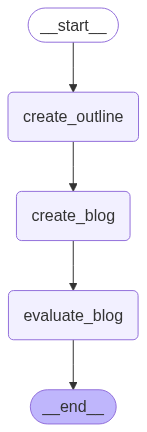

In [8]:
workflow

In [9]:
initial_state = {"title": "Rise of AI in India."}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India.', 'outline': "I. Introduction\n    A. Brief overview of artificial intelligence (AI)\n    B. Explanation of the rise of AI in India\n    C. Importance of AI in various sectors in India\n\nII. Historical background of AI in India\n    A. Timeline of AI development in India\n    B. Key milestones in AI research and innovation in India\n    C. Adoption of AI technology in Indian industries\n\nIII. Current landscape of AI in India\n    A. Growth of AI startups in India\n    B. Collaboration between government and industry to promote AI\n    C. Major players in the Indian AI market\n\nIV. Applications of AI in India\n    A. Healthcare industry\n        1. AI in disease diagnosis and treatment\n        2. AI in medical imaging\n    B. Education sector\n        1. Personalized learning through AI\n        2. AI in student assessment\n    C. E-commerce industry\n        1. AI in recommendation engines\n        2. AI in fraud detection\n\nV. Challenges and opport

In [10]:
print(final_state["outline"])

I. Introduction
    A. Brief overview of artificial intelligence (AI)
    B. Explanation of the rise of AI in India
    C. Importance of AI in various sectors in India

II. Historical background of AI in India
    A. Timeline of AI development in India
    B. Key milestones in AI research and innovation in India
    C. Adoption of AI technology in Indian industries

III. Current landscape of AI in India
    A. Growth of AI startups in India
    B. Collaboration between government and industry to promote AI
    C. Major players in the Indian AI market

IV. Applications of AI in India
    A. Healthcare industry
        1. AI in disease diagnosis and treatment
        2. AI in medical imaging
    B. Education sector
        1. Personalized learning through AI
        2. AI in student assessment
    C. E-commerce industry
        1. AI in recommendation engines
        2. AI in fraud detection

V. Challenges and opportunities in the AI sector in India
    A. Lack of skilled AI professional

In [11]:
print(final_state["content"])

The Rise of AI in India

I. Introduction

Artificial intelligence (AI) is a rapidly evolving field of technology that involves the development of machines and systems that can perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. In recent years, the adoption and implementation of AI technologies have been on the rise in India, with significant implications for various sectors of the economy. The importance of AI in India can be seen in its potential to revolutionize industries, enhance efficiency and productivity, and drive innovation.

II. Historical background of AI in India

The development of AI in India dates back several decades, with key milestones in research and innovation that have laid the foundation for the current landscape of AI in the country. Over the years, India has made significant strides in AI technology, with the establishment of research institutions, academic programs, 

In [12]:
print(final_state["evaluation_results"])

Feedback:

1. Depth of thinking while writing the blog:
The blog provides a good overview of the rise of AI in India, covering historical background, current landscape, applications, challenges, government initiatives, and future prospects. The student shows a decent level of thinking and research on the topic. However, more in-depth analysis and insights could have been included to enhance the depth of the blog.

2. Argument strength and critical thinking:
The arguments presented in the blog are well-supported with relevant information and examples. The student demonstrates critical thinking by highlighting both the opportunities and challenges in the AI sector in India. To strengthen the arguments further, the student could have provided more critical analysis and discussed potential solutions to the challenges identified.

3. Check for grammatical errors, vocabulary, fluency, and tone:
The blog is well-written with minimal grammatical errors. The vocabulary used is appropriate for t